* Por que no hay cortes en leading lepton PT?
* Por que el corte en leading photon pt es 10 y no 20?
* De donde salen Wgamma_fidcross, etc?

In [1]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

import pandas as pd

In [25]:
!ls ~/Downloads/MG5aMC_LTS_2.9.9/MG5_aMC_v2_9_9/pptowjtolnuj/

bin	     index.html       py.py		  Source
Cards	     lib	      README		  SubProcesses
crossx.html  madevent.tar.gz  README.systematics  TemplateVersion.txt
Events	     MGMEVersion.txt  run_04.lhco
HTML	     myprocid	      RunWeb


## Backgrounds

### p p > W $\gamma$ > $\nu$ + l + $\gamma$ (NOT IMPLEMENTED)

In [ ]:
#Folder = '~/Downloads/MG5aMC_LTS_2.9.9/MG5_aMC_v2_9_9/pptowjtolnuj/'
#datFolder = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wgamma/'

Wgamma_cross = 20.34
Wgamma_runs  = 10
Wgamma_NLO_A = (7.124*10**1) / (2.954*10**1) #W+gamma
Wgamma_NLO_B = (3.713*10**1) / (2.546*10**1) #W+gamma+jet
Wgamma_NLO   = (Wgamma_NLO_A * (7.124/(7.124+3.713)) ) + (Wgamma_NLO_B * (3.713/(7.124+3.713)) )

Wgamma_init_ev = 0
Wgamma_cut_ev  = 0

Wgamma_photon  = []
Wgamma_jet     = []
Wgamma_lepton  = []
Wgamma_MET     = []
Wgamma_hadinfo = []



for ii in range(1, Wgamma_runs + 1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(ii)+".lhco")
    
    Wgamma_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
                            
                    # save data        
#                     Wgamma_photon.append( [inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]] )
#                     Wgamma_jet.append( [inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]] )
#                     if inputevents[i].number()["electron"] > 0:
#                         Wgamma_lepton.append( [inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]] )
#                     else:
#                         Wgamma_lepton.append( [inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]] )
#                     Wgamma_MET.append( [inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]] )
#                     Wgamma_hadinfo.append( [HT, num_jets] )
                    
                            
                            
                    # photon info:
                    with open(datFolder+'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder+'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder+'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder+'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    Wgamma_cut_ev += 1



print('Num initial events: ', Wgamma_init_ev)
print('Total pasaron los cortes: ', Wgamma_cut_ev)

### p p > W jets > $\nu$ l jets

In [5]:
ph_number = []
jet_number = []
e_number = []
mu_number = []

for i in range(len(inputevents)):
    ph_number.append(inputevents[i].number()['photon'])
    jet_number.append(inputevents[i].number()['jet'])
    e_number.append(inputevents[i].number()['electron'])
    mu_number.append(inputevents[i].number()['muon'])
    
    
print('events with photons ', len(np.where(np.asarray(ph_number) > 0)[0]))
print('events with jets ', len(np.where(np.asarray(jet_number) > 0)[0]))
print('events with electrons ', len(np.where(np.asarray(e_number) > 0)[0]))
print('events with muons ', len(np.where(np.asarray(mu_number) > 0)[0]))

('events with photons ', 32273)
('events with jets ', 544895)
('events with electrons ', 155294)
('events with muons ', 206141)


In [15]:
Folder    = '/home/martinrios/Downloads/MG5aMC_LTS_2.9.9/MG5_aMC_v2_9_9/pptowjtolnuj/'
datFolder = '../data/Wjets/'

Wjets_cross = 387.0
Wjets_runs  = 4
Wjets_NLO_A = (2.843*10**4) / (2.045*10**4) # W+jet
Wjets_NLO_B = (7.786*10**3) / (6.805*10**3) # W+jet+jet
Wjets_NLO   = (Wjets_NLO_A * (28.43/(28.43+7.786)) ) + (Wjets_NLO_B * (7.786/(28.43+7.786)) )

Wjets_init_ev = 0
Wjets_cut_ev  = 0

Wjets_photon  = []
Wjets_jet     = []
Wjets_lepton  = []
Wjets_MET     = []
Wjets_hadinfo = []


for ii in range(4, Wjets_runs + 2):
    
    inputevents = LHCO_reader.Events(f_name = Folder + "run_0" + str(ii) + ".lhco")
    
    Wjets_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
             
                            
                    # photon info:
                    with open(datFolder + 'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder + 'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder + 'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder + 'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder + 'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder + 'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    Wjets_cut_ev += 1

print('Num initial events: ', Wjets_init_ev)
print('Total pasaron los cortes: ', Wjets_cut_ev)

('Num initial events: ', 1093185)
('Total pasaron los cortes: ', 8340)


In [16]:
cross = Wjets_cross*1000*Wjets_NLO
aceptancia = Wjets_cut_ev/(1.*Wjets_init_ev)
luminosidad = 139

Wjets_fidcross = cross * aceptancia
Wjets_expected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wjets_fidcross)
print('Events expected: ', Wjets_expected)

('fiducial cross section: ', 3948.3772654494587)
('Events expected: ', 548824.4398974747)


# Python 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm


from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate


import xgboost
from xgboost import XGBRegressor, XGBClassifier

In [2]:
Wgamma_fidcross  = 2486.497337761751
Wjets_fidcross   = 3822.7677506632535
ttgamma_fidcross = 78.35293071648898
B_fidcross_tot   = Wgamma_fidcross + Wjets_fidcross + ttgamma_fidcross
B_fidcross_tot

6387.618019141494

In [4]:
sample = 25000 #22800 # # of signal and background events to plot their distributions

#Wgamma_sample  = int(round(sample*Wgamma_fidcross/B_fidcross_tot))
Wjets_sample   = int(round(sample * Wjets_fidcross / B_fidcross_tot))
#ttgamma_sample = int(round(sample*ttgamma_fidcross/B_fidcross_tot))

#print(Wgamma_sample)
print(Wjets_sample)
#print(ttgamma_sample)

14962


In [5]:
##############
# input data #
##############

# photon -> (pT, eta, phi) from the leading photon
# jet -> (pT, eta, phi) from the leading jet
# lepton -> (pT, eta, phi) from the lepton (electron or muon)
# MET -> (pT, eta, phi) eta = 0 by construction, but phi is important because we have a lot of jets that we do not use
# hadinfo -> (HT, num_jets)  HT: sum PT of all the jets, number of jets (b-tag or not)


######
# SM #
######

##### # W gamma + W gamma jet #
##### # Dominant # Np es el W jet el dominant??
##### 
##### datFolderWgamma = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wgamma/'
##### 
##### photon_Wgamma  = np.loadtxt(datFolderWgamma + 'photon.dat', delimiter=' ')
##### jet_Wgamma     = np.loadtxt(datFolderWgamma + 'jet.dat', delimiter=' ')
##### lepton_Wgamma  = np.loadtxt(datFolderWgamma + 'lepton.dat', delimiter=' ')
##### MET_Wgamma     = np.loadtxt(datFolderWgamma + 'MET.dat', delimiter=' ')
##### hadinfo_Wgamma = np.loadtxt(datFolderWgamma + 'hadinfo.dat', delimiter=' ')


# W jet + W jet jet #

datFolderWjets = '../data/Wjets/'

photon_Wjets  = np.loadtxt(datFolderWjets + 'photon.dat', delimiter=' ')
jet_Wjets     = np.loadtxt(datFolderWjets + 'jet.dat', delimiter=' ')
lepton_Wjets  = np.loadtxt(datFolderWjets + 'lepton.dat', delimiter=' ')
MET_Wjets     = np.loadtxt(datFolderWjets + 'MET.dat', delimiter=' ')
hadinfo_Wjets = np.loadtxt(datFolderWjets + 'hadinfo.dat', delimiter=' ')


# tt gamma + tt gamma jet #

#### datFolderttgamma = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/ttgamma/'
#### 
#### photon_ttgamma  = np.loadtxt(datFolderttgamma + 'photon.dat', delimiter=' ')
#### jet_ttgamma     = np.loadtxt(datFolderttgamma + 'jet.dat', delimiter=' ')
#### lepton_ttgamma  = np.loadtxt(datFolderttgamma + 'lepton.dat', delimiter=' ')
#### MET_ttgamma     = np.loadtxt(datFolderttgamma + 'MET.dat', delimiter=' ')
#### hadinfo_ttgamma = np.loadtxt(datFolderttgamma + 'hadinfo.dat', delimiter=' ')


photon_SM  = photon_Wjets#np.concatenate([photon_Wgamma[:Wgamma_sample], photon_Wjets[:Wjets_sample], photon_ttgamma[:ttgamma_sample]])
jet_SM     = jet_Wjets#np.concatenate([jet_Wgamma[:Wgamma_sample], jet_Wjets[:Wjets_sample], jet_ttgamma[:ttgamma_sample]]) 
lepton_SM  = lepton_Wjets#np.concatenate([lepton_Wgamma[:Wgamma_sample], lepton_Wjets[:Wjets_sample], lepton_ttgamma[:ttgamma_sample]])
MET_SM     = MET_Wjets#np.concatenate([MET_Wgamma[:Wgamma_sample], MET_Wjets[:Wjets_sample], MET_ttgamma[:ttgamma_sample]])
hadinfo_SM = hadinfo_Wjets#np.concatenate([hadinfo_Wgamma[:Wgamma_sample], hadinfo_Wjets[:Wjets_sample], hadinfo_ttgamma[:ttgamma_sample]])


######
# NP #
######

##### datFolderNP = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wino/'
##### 
##### photon_NP  = np.loadtxt(datFolderNP + 'photon.dat', delimiter=' ')
##### jet_NP     = np.loadtxt(datFolderNP + 'jet.dat', delimiter=' ')
##### lepton_NP  = np.loadtxt(datFolderNP + 'lepton.dat', delimiter=' ')
##### MET_NP     = np.loadtxt(datFolderNP + 'MET.dat', delimiter=' ')
##### hadinfo_NP = np.loadtxt(datFolderNP + 'hadinfo.dat', delimiter=' ')

In [11]:
# other variables, individual channels:

####HT_main_Wgamma = photon_Wgamma[:,0]+lepton_Wgamma[:,0]+jet_Wgamma[:,0]
####
####MET_sig_Wgamma = np.divide( MET_Wgamma[:,0],np.sqrt(HT_main_Wgamma) )
####
####m_eff_Wgamma = MET_Wgamma[:,0] + photon_Wgamma[:,0]+lepton_Wgamma[:,0]+jet_Wgamma[:,0]
####
####phi_MET_photon_Wgamma = np.absolute( MET_Wgamma[:,2] - photon_Wgamma[:,2] )
####phi_MET_jet_Wgamma = np.absolute( MET_Wgamma[:,2] - jet_Wgamma[:,2] )
####phi_MET_lepton_Wgamma = np.absolute( MET_Wgamma[:,2] - lepton_Wgamma[:,2] )

####mT_photon_Wgamma = np.sqrt( (2*photon_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_photon_Wgamma)) )
####mT_jet_Wgamma = np.sqrt( (2*jet_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_jet_Wgamma)) )
####mT_lepton_Wgamma = np.sqrt( (2*lepton_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_lepton_Wgamma)) )
####
####phi_photon_jet_Wgamma = np.absolute( photon_Wgamma[:,2] - jet_Wgamma[:,2] )
####phi_photon_lepton_Wgamma = np.absolute( photon_Wgamma[:,2] - lepton_Wgamma[:,2] )
####phi_lepton_jet_Wgamma = np.absolute( lepton_Wgamma[:,2] - jet_Wgamma[:,2] )
####
####phi_photon_jet_Wgamma[phi_photon_jet_Wgamma>np.pi] = (2.* np.pi) - phi_photon_jet_Wgamma[phi_photon_jet_Wgamma>np.pi]
####phi_photon_lepton_Wgamma[phi_photon_lepton_Wgamma>np.pi] = (2.* np.pi) - phi_photon_lepton_Wgamma[phi_photon_lepton_Wgamma>np.pi]
####phi_lepton_jet_Wgamma[phi_lepton_jet_Wgamma>np.pi] = (2.* np.pi) - phi_lepton_jet_Wgamma[phi_lepton_jet_Wgamma>np.pi]
####
####deltaR_photon_jet_Wgamma = np.sqrt( (photon_Wgamma[:,1]-jet_Wgamma[:,1])**2 + (phi_photon_jet_Wgamma)**2 )
####deltaR_photon_lepton_Wgamma = np.sqrt( (photon_Wgamma[:,1]-lepton_Wgamma[:,1])**2 + (phi_photon_lepton_Wgamma)**2 )
####deltaR_lepton_jet_Wgamma = np.sqrt( (lepton_Wgamma[:,1]-jet_Wgamma[:,1])**2 + (phi_lepton_jet_Wgamma)**2 )

HT_main_Wjets = photon_Wjets[:,0]+lepton_Wjets[:,0]+jet_Wjets[:,0]

MET_sig_Wjets = np.divide( MET_Wjets[:,0],np.sqrt(HT_main_Wjets) )

m_eff_Wjets = MET_Wjets[:,0] + photon_Wjets[:,0]+lepton_Wjets[:,0]+jet_Wjets[:,0]

phi_MET_photon_Wjets = np.absolute( MET_Wjets[:,2] - photon_Wjets[:,2] )
phi_MET_jet_Wjets = np.absolute( MET_Wjets[:,2] - jet_Wjets[:,2] )
phi_MET_lepton_Wjets = np.absolute( MET_Wjets[:,2] - lepton_Wjets[:,2] )

mT_photon_Wjets = np.sqrt( (2*photon_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_photon_Wjets)) )
mT_jet_Wjets = np.sqrt( (2*jet_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_jet_Wjets)) )
mT_lepton_Wjets = np.sqrt( (2*lepton_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_lepton_Wjets)) )

phi_photon_jet_Wjets = np.absolute( photon_Wjets[:,2] - jet_Wjets[:,2] )
phi_photon_lepton_Wjets = np.absolute( photon_Wjets[:,2] - lepton_Wjets[:,2] )
phi_lepton_jet_Wjets = np.absolute( lepton_Wjets[:,2] - jet_Wjets[:,2] )

phi_photon_jet_Wjets[phi_photon_jet_Wjets>np.pi] = (2.* np.pi) - phi_photon_jet_Wjets[phi_photon_jet_Wjets>np.pi]
phi_photon_lepton_Wjets[phi_photon_lepton_Wjets>np.pi] = (2.* np.pi) - phi_photon_lepton_Wjets[phi_photon_lepton_Wjets>np.pi]
phi_lepton_jet_Wjets[phi_lepton_jet_Wjets>np.pi] = (2.* np.pi) - phi_lepton_jet_Wjets[phi_lepton_jet_Wjets>np.pi]

deltaR_photon_jet_Wjets = np.sqrt( (photon_Wjets[:,1]-jet_Wjets[:,1])**2 + (phi_photon_jet_Wjets)**2 )
deltaR_photon_lepton_Wjets = np.sqrt( (photon_Wjets[:,1]-lepton_Wjets[:,1])**2 + (phi_photon_lepton_Wjets)**2 )
deltaR_lepton_jet_Wjets = np.sqrt( (lepton_Wjets[:,1]-jet_Wjets[:,1])**2 + (phi_lepton_jet_Wjets)**2 )



####HT_main_ttgamma = photon_ttgamma[:,0]+lepton_ttgamma[:,0]+jet_ttgamma[:,0]

####MET_sig_ttgamma = np.divide( MET_ttgamma[:,0],np.sqrt(HT_main_ttgamma) )

####m_eff_ttgamma = MET_ttgamma[:,0] + photon_ttgamma[:,0]+lepton_ttgamma[:,0]+jet_ttgamma[:,0]

####phi_MET_photon_ttgamma = np.absolute( MET_ttgamma[:,2] - photon_ttgamma[:,2] )
####phi_MET_jet_ttgamma = np.absolute( MET_ttgamma[:,2] - jet_ttgamma[:,2] )
####phi_MET_lepton_ttgamma = np.absolute( MET_ttgamma[:,2] - lepton_ttgamma[:,2] )

####mT_photon_ttgamma = np.sqrt( (2*photon_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_photon_ttgamma)) )
####mT_jet_ttgamma = np.sqrt( (2*jet_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_jet_ttgamma)) )
####mT_lepton_ttgamma = np.sqrt( (2*lepton_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_lepton_ttgamma)) )

####phi_photon_jet_ttgamma = np.absolute( photon_ttgamma[:,2] - jet_ttgamma[:,2] )
####phi_photon_lepton_ttgamma = np.absolute( photon_ttgamma[:,2] - lepton_ttgamma[:,2] )
####phi_lepton_jet_ttgamma = np.absolute( lepton_ttgamma[:,2] - jet_ttgamma[:,2] )

####phi_photon_jet_ttgamma[phi_photon_jet_ttgamma>np.pi] = (2.* np.pi) - phi_photon_jet_ttgamma[phi_photon_jet_ttgamma>np.pi]
####phi_photon_lepton_ttgamma[phi_photon_lepton_ttgamma>np.pi] = (2.* np.pi) - phi_photon_lepton_ttgamma[phi_photon_lepton_ttgamma>np.pi]
####phi_lepton_jet_ttgamma[phi_lepton_jet_ttgamma>np.pi] = (2.* np.pi) - phi_lepton_jet_ttgamma[phi_lepton_jet_ttgamma>np.pi]

####deltaR_photon_jet_ttgamma = np.sqrt( (photon_ttgamma[:,1]-jet_ttgamma[:,1])**2 + (phi_photon_jet_ttgamma)**2 )
####deltaR_photon_lepton_ttgamma = np.sqrt( (photon_ttgamma[:,1]-lepton_ttgamma[:,1])**2 + (phi_photon_lepton_ttgamma)**2 )
####deltaR_lepton_jet_ttgamma = np.sqrt( (lepton_ttgamma[:,1]-jet_ttgamma[:,1])**2 + (phi_lepton_jet_ttgamma)**2 )



# other variables

HT_main_SM = photon_SM[:,0]+lepton_SM[:,0]+jet_SM[:,0]

MET_sig_SM = np.divide( MET_SM[:,0],np.sqrt(HT_main_SM) )

m_eff_SM = MET_SM[:,0] + photon_SM[:,0]+lepton_SM[:,0]+jet_SM[:,0]

phi_MET_photon_SM = np.absolute( MET_SM[:,2] - photon_SM[:,2] )
phi_MET_jet_SM = np.absolute( MET_SM[:,2] - jet_SM[:,2] )
phi_MET_lepton_SM = np.absolute( MET_SM[:,2] - lepton_SM[:,2] )

mT_photon_SM = np.sqrt( (2*photon_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_photon_SM)) )
mT_jet_SM = np.sqrt( (2*jet_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_jet_SM)) )
mT_lepton_SM = np.sqrt( (2*lepton_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_lepton_SM)) )

phi_photon_jet_SM = np.absolute( photon_SM[:,2] - jet_SM[:,2] )
phi_photon_lepton_SM = np.absolute( photon_SM[:,2] - lepton_SM[:,2] )
phi_lepton_jet_SM = np.absolute( lepton_SM[:,2] - jet_SM[:,2] )

phi_photon_jet_SM[phi_photon_jet_SM>np.pi] = (2.* np.pi) - phi_photon_jet_SM[phi_photon_jet_SM>np.pi]
phi_photon_lepton_SM[phi_photon_lepton_SM>np.pi] = (2.* np.pi) - phi_photon_lepton_SM[phi_photon_lepton_SM>np.pi]
phi_lepton_jet_SM[phi_lepton_jet_SM>np.pi] = (2.* np.pi) - phi_lepton_jet_SM[phi_lepton_jet_SM>np.pi]

deltaR_photon_jet_SM = np.sqrt( (photon_SM[:,1]-jet_SM[:,1])**2 + (phi_photon_jet_SM)**2 )
deltaR_photon_lepton_SM = np.sqrt( (photon_SM[:,1]-lepton_SM[:,1])**2 + (phi_photon_lepton_SM)**2 )
deltaR_lepton_jet_SM = np.sqrt( (lepton_SM[:,1]-jet_SM[:,1])**2 + (phi_lepton_jet_SM)**2 )

# other variables

####HT_main_NP = photon_NP[:,0]+lepton_NP[:,0]+jet_NP[:,0]

####MET_sig_NP = np.divide( MET_NP[:,0],np.sqrt(HT_main_NP) )

####m_eff_NP = MET_NP[:,0] + photon_NP[:,0]+lepton_NP[:,0]+jet_NP[:,0]

####phi_MET_photon_NP = np.absolute( MET_NP[:,2] - photon_NP[:,2] )
####phi_MET_jet_NP = np.absolute( MET_NP[:,2] - jet_NP[:,2] )
####phi_MET_lepton_NP = np.absolute( MET_NP[:,2] - lepton_NP[:,2] )

####mT_photon_NP = np.sqrt( (2*photon_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_photon_NP)) )
####mT_jet_NP = np.sqrt( (2*jet_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_jet_NP)) )
####mT_lepton_NP = np.sqrt( (2*lepton_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_lepton_NP)) )

####phi_photon_jet_NP = np.absolute( photon_NP[:,2] - jet_NP[:,2] )
####phi_photon_lepton_NP = np.absolute( photon_NP[:,2] - lepton_NP[:,2] )
####phi_lepton_jet_NP = np.absolute( lepton_NP[:,2] - jet_NP[:,2] )

####phi_photon_jet_NP[phi_photon_jet_NP>np.pi] = (2.* np.pi) - phi_photon_jet_NP[phi_photon_jet_NP>np.pi]
####phi_photon_lepton_NP[phi_photon_lepton_NP>np.pi] = (2.* np.pi) - phi_photon_lepton_NP[phi_photon_lepton_NP>np.pi]
####phi_lepton_jet_NP[phi_lepton_jet_NP>np.pi] = (2.* np.pi) - phi_lepton_jet_NP[phi_lepton_jet_NP>np.pi]

####deltaR_photon_jet_NP = np.sqrt( (photon_NP[:,1]-jet_NP[:,1])**2 + (phi_photon_jet_NP)**2 )
####deltaR_photon_lepton_NP = np.sqrt( (photon_NP[:,1]-lepton_NP[:,1])**2 + (phi_photon_lepton_NP)**2 )
####deltaR_lepton_jet_NP = np.sqrt( (lepton_NP[:,1]-jet_NP[:,1])**2 + (phi_lepton_jet_NP)**2 )

In [12]:
photon_SM.shape

(57988, 3)

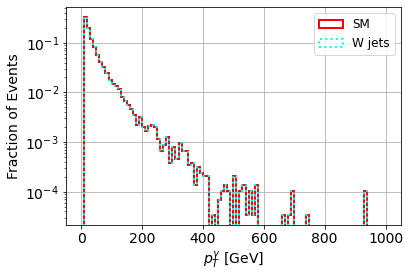

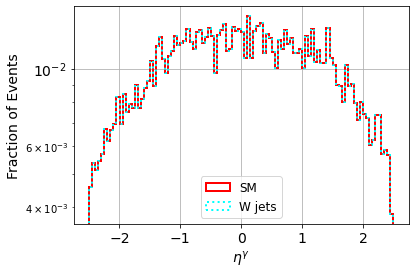

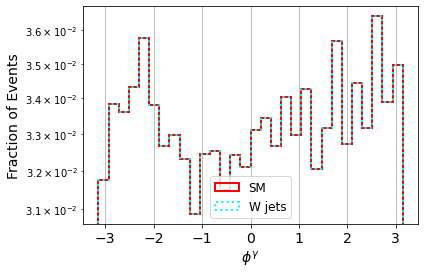

In [13]:
#weights = np.ones_like(photon_NP[:,0])/len(photon_NP[:,0])
#plt.hist(photon_NP[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,0])/len(photon_SM[:,0])
plt.hist(photon_SM[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(photon_Wgamma[:,0])/len(photon_Wgamma[:,0])
#plt.hist(photon_Wgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(photon_Wjets[:,0])/len(photon_Wjets[:,0])
plt.hist(photon_Wjets[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(photon_ttgamma[:,0])/len(photon_ttgamma[:,0])
#plt.hist(photon_ttgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()
plt.xlabel(r"$p_T^{\gamma}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(photon_NP[:,1])/len(photon_NP[:,1])
#plt.hist(photon_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,1])/len(photon_SM[:,1])
plt.hist(photon_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(photon_Wgamma[:,1])/len(photon_Wgamma[:,1])
#plt.hist(photon_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(photon_Wjets[:,1])/len(photon_Wjets[:,1])
plt.hist(photon_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(photon_ttgamma[:,1])/len(photon_ttgamma[:,1])
#plt.hist(photon_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\eta^{\gamma}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

#weights = np.ones_like(photon_NP[:,2])/len(photon_NP[:,2])
#plt.hist(photon_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,2])/len(photon_SM[:,2])
plt.hist(photon_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(photon_Wgamma[:,2])/len(photon_Wgamma[:,2])
#plt.hist(photon_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(photon_Wjets[:,2])/len(photon_Wjets[:,2])
plt.hist(photon_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(photon_ttgamma[:,2])/len(photon_ttgamma[:,2])
#plt.hist(photon_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\phi^{\gamma}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

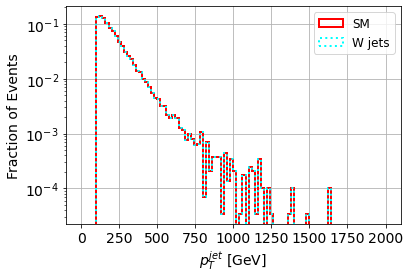

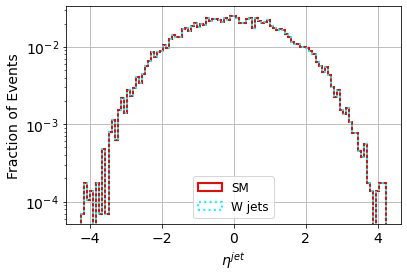

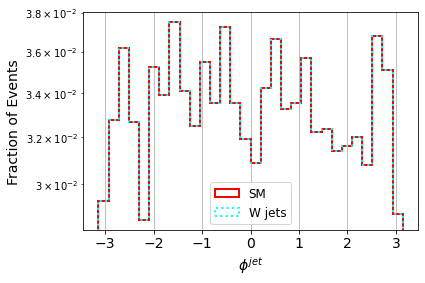

In [14]:
#weights = np.ones_like(jet_NP[:,0])/len(jet_NP[:,0])
#plt.hist(jet_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,0])/len(jet_SM[:,0])
plt.hist(jet_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(jet_Wgamma[:,0])/len(jet_Wgamma[:,0])
#plt.hist(jet_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(jet_Wjets[:,0])/len(jet_Wjets[:,0])
plt.hist(jet_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(jet_ttgamma[:,0])/len(jet_ttgamma[:,0])
#plt.hist(jet_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$p_T^{jet}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(jet_NP[:,1])/len(jet_NP[:,1])
#plt.hist(jet_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,1])/len(jet_SM[:,1])
plt.hist(jet_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(jet_Wgamma[:,1])/len(jet_Wgamma[:,1])
#plt.hist(jet_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(jet_Wjets[:,1])/len(jet_Wjets[:,1])
plt.hist(jet_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(jet_ttgamma[:,1])/len(jet_ttgamma[:,1])
#plt.hist(jet_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\eta^{jet}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

#weights = np.ones_like(jet_NP[:,2])/len(jet_NP[:,2])
#plt.hist(jet_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,2])/len(jet_SM[:,2])
plt.hist(jet_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(jet_Wgamma[:,2])/len(jet_Wgamma[:,2])
#plt.hist(jet_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(jet_Wjets[:,2])/len(jet_Wjets[:,2])
plt.hist(jet_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(jet_ttgamma[:,2])/len(jet_ttgamma[:,2])
#plt.hist(jet_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\phi^{jet}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

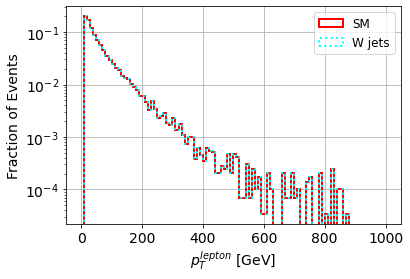

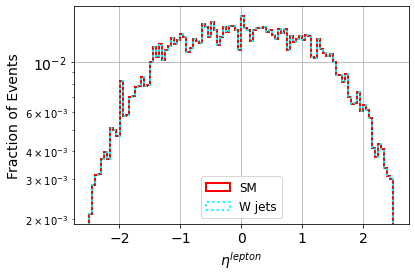

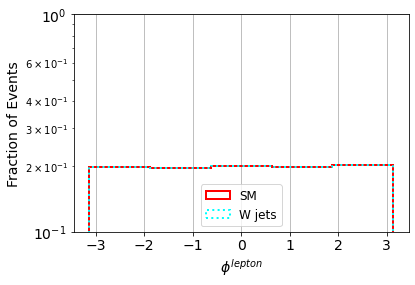

In [15]:
#weights = np.ones_like(lepton_NP[:,0])/len(lepton_NP[:,0])
#plt.hist(lepton_NP[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,0])/len(lepton_SM[:,0])
plt.hist(lepton_SM[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(lepton_Wgamma[:,0])/len(lepton_Wgamma[:,0])
#plt.hist(lepton_Wgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(lepton_Wjets[:,0])/len(lepton_Wjets[:,0])
plt.hist(lepton_Wjets[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(lepton_ttgamma[:,0])/len(lepton_ttgamma[:,0])
#plt.hist(lepton_ttgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$p_T^{lepton}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(lepton_NP[:,1])/len(lepton_NP[:,1])
#plt.hist(lepton_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,1])/len(lepton_SM[:,1])
plt.hist(lepton_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(lepton_Wgamma[:,1])/len(lepton_Wgamma[:,1])
#plt.hist(lepton_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(lepton_Wjets[:,1])/len(lepton_Wjets[:,1])
plt.hist(lepton_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(lepton_ttgamma[:,1])/len(lepton_ttgamma[:,1])
#plt.hist(lepton_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\eta^{lepton}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

#weights = np.ones_like(lepton_NP[:,2])/len(lepton_NP[:,2])
#plt.hist(lepton_NP[:,2], weights=weights, bins=5, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,2])/len(lepton_SM[:,2])
plt.hist(lepton_SM[:,2], weights=weights, bins=5, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(lepton_Wgamma[:,2])/len(lepton_Wgamma[:,2])
#plt.hist(lepton_Wgamma[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(lepton_Wjets[:,2])/len(lepton_Wjets[:,2])
plt.hist(lepton_Wjets[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(lepton_ttgamma[:,2])/len(lepton_ttgamma[:,2])
#plt.hist(lepton_ttgamma[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\phi^{lepton}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.1,1)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

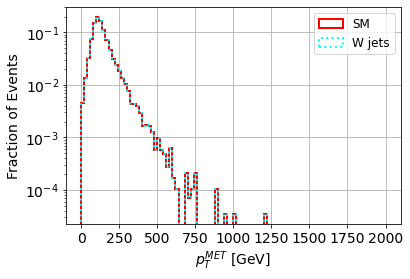

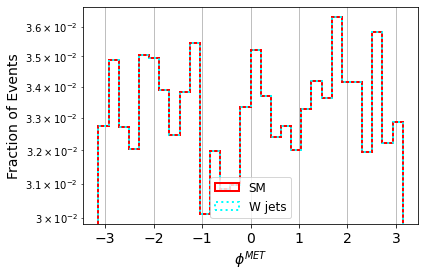

In [16]:
#weights = np.ones_like(MET_NP[:,0])/len(MET_NP[:,0])
#plt.hist(MET_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_SM[:,0])/len(MET_SM[:,0])
plt.hist(MET_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(MET_Wgamma[:,0])/len(MET_Wgamma[:,0])
#plt.hist(MET_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(MET_Wjets[:,0])/len(MET_Wjets[:,0])
plt.hist(MET_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(MET_ttgamma[:,0])/len(MET_ttgamma[:,0])
#plt.hist(MET_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$p_T^{MET}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(MET_NP[:,2])/len(MET_NP[:,2])
#plt.hist(MET_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_SM[:,2])/len(MET_SM[:,2])
plt.hist(MET_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(MET_Wgamma[:,2])/len(MET_Wgamma[:,2])
#plt.hist(MET_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(MET_Wjets[:,2])/len(MET_Wjets[:,2])
plt.hist(MET_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(MET_ttgamma[:,2])/len(MET_ttgamma[:,2])
#plt.hist(MET_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$\phi^{MET}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

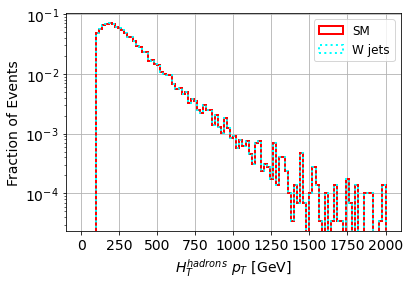

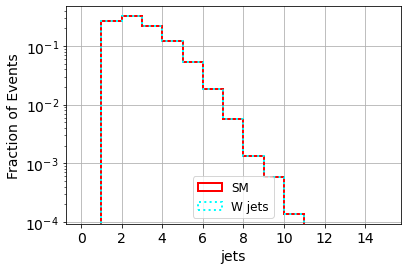

In [17]:
#weights = np.ones_like(hadinfo_NP[:,0])/len(hadinfo_NP[:,0])
#plt.hist(hadinfo_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(hadinfo_SM[:,0])/len(hadinfo_SM[:,0])
plt.hist(hadinfo_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(hadinfo_Wgamma[:,0])/len(hadinfo_Wgamma[:,0])
#plt.hist(hadinfo_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(hadinfo_Wjets[:,0])/len(hadinfo_Wjets[:,0])
plt.hist(hadinfo_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(hadinfo_ttgamma[:,0])/len(hadinfo_ttgamma[:,0])
#plt.hist(hadinfo_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$H_T^{hadrons}$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(hadinfo_NP[:,1])/len(hadinfo_NP[:,1])
#plt.hist(hadinfo_NP[:,1], weights=weights, bins=15, range=[0,15], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(hadinfo_SM[:,1])/len(hadinfo_SM[:,1])
plt.hist(hadinfo_SM[:,1], weights=weights, bins=15, range=[0,15], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(hadinfo_Wgamma[:,1])/len(hadinfo_Wgamma[:,1])
#plt.hist(hadinfo_Wgamma[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(hadinfo_Wjets[:,1])/len(hadinfo_Wjets[:,1])
plt.hist(hadinfo_Wjets[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(hadinfo_ttgamma[:,1])/len(hadinfo_ttgamma[:,1])
#plt.hist(hadinfo_ttgamma[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"jets",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

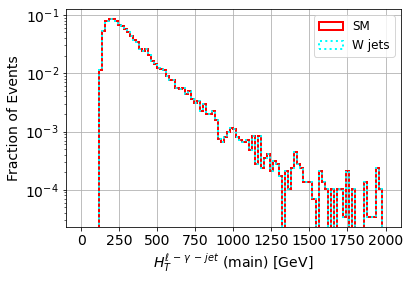

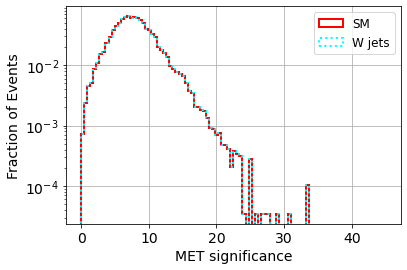

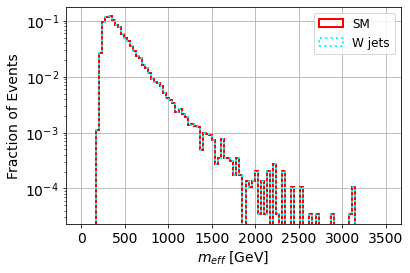

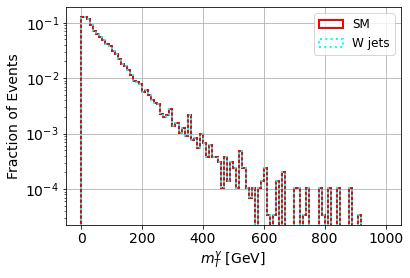

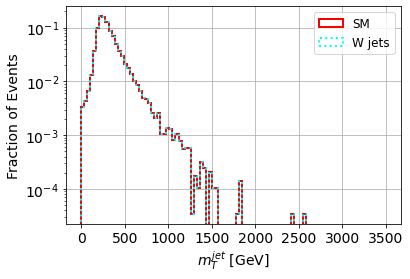

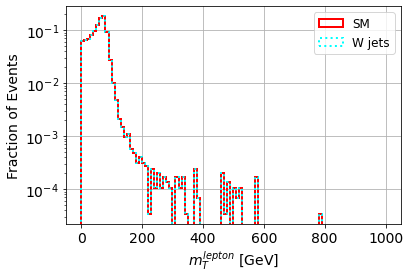

In [18]:
#weights = np.ones_like(HT_main_NP)/len(HT_main_NP)
#plt.hist(HT_main_NP, weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(HT_main_SM)/len(HT_main_SM)
plt.hist(HT_main_SM, weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(HT_main_Wgamma)/len(HT_main_Wgamma)
#plt.hist(HT_main_Wgamma, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(HT_main_Wjets)/len(HT_main_Wjets)
plt.hist(HT_main_Wjets, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(HT_main_ttgamma)/len(HT_main_ttgamma)
#plt.hist(HT_main_ttgamma, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$H_T^{\ell \,-\, \gamma \,-\, jet}$ (main) [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(MET_sig_NP)/len(MET_sig_NP)
#plt.hist(MET_sig_NP, weights=weights, bins=100, range=[0,45], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_sig_SM)/len(MET_sig_SM)
plt.hist(MET_sig_SM, weights=weights, bins=100, range=[0,45], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(MET_sig_Wgamma)/len(MET_sig_Wgamma)
#plt.hist(MET_sig_Wgamma, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(MET_sig_Wjets)/len(MET_sig_Wjets)
plt.hist(MET_sig_Wjets, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(MET_sig_ttgamma)/len(MET_sig_ttgamma)
#plt.hist(MET_sig_ttgamma, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"MET significance",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(m_eff_NP)/len(m_eff_NP)
#plt.hist(m_eff_NP, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(m_eff_SM)/len(m_eff_SM)
plt.hist(m_eff_SM, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(m_eff_Wgamma)/len(m_eff_Wgamma)
#plt.hist(m_eff_Wgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(m_eff_Wjets)/len(m_eff_Wjets)
plt.hist(m_eff_Wjets, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(m_eff_ttgamma)/len(m_eff_ttgamma)
#plt.hist(m_eff_ttgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$m_{eff}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(mT_photon_NP)/len(mT_photon_NP)
#plt.hist(mT_photon_NP, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_photon_SM)/len(mT_photon_SM)
plt.hist(mT_photon_SM, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(mT_photon_Wgamma)/len(mT_photon_Wgamma)
#plt.hist(mT_photon_Wgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(mT_photon_Wjets)/len(mT_photon_Wjets)
plt.hist(mT_photon_Wjets, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(mT_photon_ttgamma)/len(mT_photon_ttgamma)
#plt.hist(mT_photon_ttgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$m_{T}^{\gamma}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(mT_jet_NP)/len(mT_jet_NP)
#plt.hist(mT_jet_NP, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_jet_SM)/len(mT_jet_SM)
plt.hist(mT_jet_SM, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(mT_jet_Wgamma)/len(mT_jet_Wgamma)
#plt.hist(mT_jet_Wgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(mT_jet_Wjets)/len(mT_jet_Wjets)
plt.hist(mT_jet_Wjets, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(mT_jet_ttgamma)/len(mT_jet_ttgamma)
#plt.hist(mT_jet_ttgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$m_{T}^{jet}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

#weights = np.ones_like(mT_lepton_NP)/len(mT_lepton_NP)
#plt.hist(mT_lepton_NP, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_lepton_SM)/len(mT_lepton_SM)
plt.hist(mT_lepton_SM, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
#weights = np.ones_like(mT_lepton_Wgamma)/len(mT_lepton_Wgamma)
#plt.hist(mT_lepton_Wgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
weights = np.ones_like(mT_lepton_Wjets)/len(mT_lepton_Wjets)
plt.hist(mT_lepton_Wjets, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
#weights = np.ones_like(mT_lepton_ttgamma)/len(mT_lepton_ttgamma)
#plt.hist(mT_lepton_ttgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  
plt.xlabel(r"$m_{T}^{lepton}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()